In [4]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

The data here is available from https://data.gov.ie/
Four years worth of data is available

In [5]:
data_path = "./Referrals/"

In [6]:
file_list = glob.glob(data_path + '/*')

In [7]:
data2016 = pd.read_csv(file_list[0])
data2017 = pd.read_csv(file_list[1])
data2015 = pd.read_csv(file_list[2])
data2018 = pd.read_csv(file_list[3])

The date formatting changes in 2017 and 2018 to from Mon-YY to Mon-YYYY so we account for this using Python's strptime

In [8]:
data2015['month_year'] =  [dt.strptime(x, '%b-%y') for x in data2015.Month_Year]


In [9]:
data2016['month_year'] =  [dt.strptime(x, '%b-%y') for x in data2016.Month_Year]

In [10]:
data2017['month_year'] =  [dt.strptime(x, '%b-%Y') for x in data2017.Month_Year]

In [11]:
data2018['month_year'] =  [dt.strptime(x, '%b-%Y') for x in data2018.Month_Year]

Concatenate the data in to one dataset

In [12]:
all_data = data2015.append(data2016).append(data2017).append(data2018)

In [13]:
all_data.head()

,Month_Year,Hospital_Name,Hospital_ID,Hospital_Department,ReferralType,TotalReferrals,month_year
0,Aug-15,AMNCH,1049,Paediatric ENT,General Referral,2,2015-08-01
1,Aug-15,AMNCH,1049,Paediatric Gastroenterology,General Referral,4,2015-08-01
2,Aug-15,AMNCH,1049,Paediatric General Surgery,General Referral,4,2015-08-01
3,Aug-15,Bantry General Hospital,704,Gastroenterology,General Referral,12,2015-08-01
4,Aug-15,Bantry General Hospital,704,General Medicine,General Referral,18,2015-08-01


Use the timestamp as dataframe index to amke it easier working with time series later

In [14]:
time_data = all_data.set_index('month_year', drop=False)

In [15]:
time_data.head()

,Month_Year,Hospital_Name,Hospital_ID,Hospital_Department,ReferralType,TotalReferrals,month_year
month_year,,,,,,,
2015-08-01,Aug-15,AMNCH,1049,Paediatric ENT,General Referral,2,2015-08-01
2015-08-01,Aug-15,AMNCH,1049,Paediatric Gastroenterology,General Referral,4,2015-08-01
2015-08-01,Aug-15,AMNCH,1049,Paediatric General Surgery,General Referral,4,2015-08-01
2015-08-01,Aug-15,Bantry General Hospital,704,Gastroenterology,General Referral,12,2015-08-01
2015-08-01,Aug-15,Bantry General Hospital,704,General Medicine,General Referral,18,2015-08-01


In [16]:
sns.set(rc={'figure.figsize':(11, 4)})

Plot of the raw data point over time, each dot represnets the smallest unit in the dataset, a number of referrals in a given hospital, in a given department, by ferral type, in a given month and year

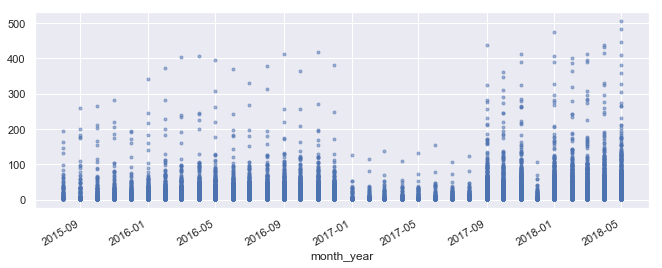

In [17]:
time_data['TotalReferrals'].plot(marker = '.', linewidth=0.5,  alpha=0.5, linestyle='None')

In [18]:
time_data.ReferralType.value_counts()

General Referral             11821
Pigmented Lesion Referral       99
Breast Clinic Referral          92
Prostate Cancer Referral        76
Ophthalmology Referral          70
Lung Cancer Referral            68
Endoscopy Referral              33
Neurology Referral              19
Name: ReferralType, dtype: int64

In [19]:
time_data.Hospital_Department.value_counts()

General Surgery                                       622
Gynaecology                                           610
Cardiology                                            507
Urology                                               497
Dermatology                                           467
Orthopaedics                                          437
Endocrinology                                         420
Paediatrics                                           404
Rheumatology                                          403
General Medicine                                      363
Ophthalmology                                         332
Haematology                                           320
Gastroenterology                                      297
Neurology                                             273
ENT                                                   268
Nephrology                                            235
Plastic Surgery                                       227
Geriatric Medi

Now we plot the total referral counts by month

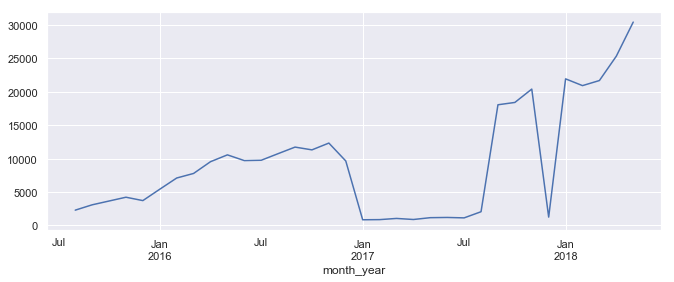

In [20]:
time_data['TotalReferrals'].groupby('month_year').sum().plot()

The average count per month (this is an average of the smallest units so not very interesting, 
                             it will be more informative to look at hospital averages later)

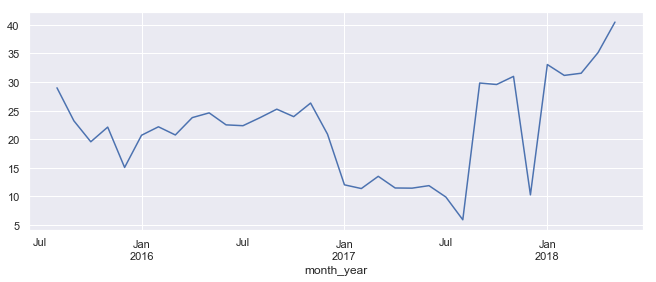

In [21]:
time_data['TotalReferrals'].groupby('month_year').mean().plot()

In [22]:
sns.set(rc={'figure.figsize':(21, 10)})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'month_year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


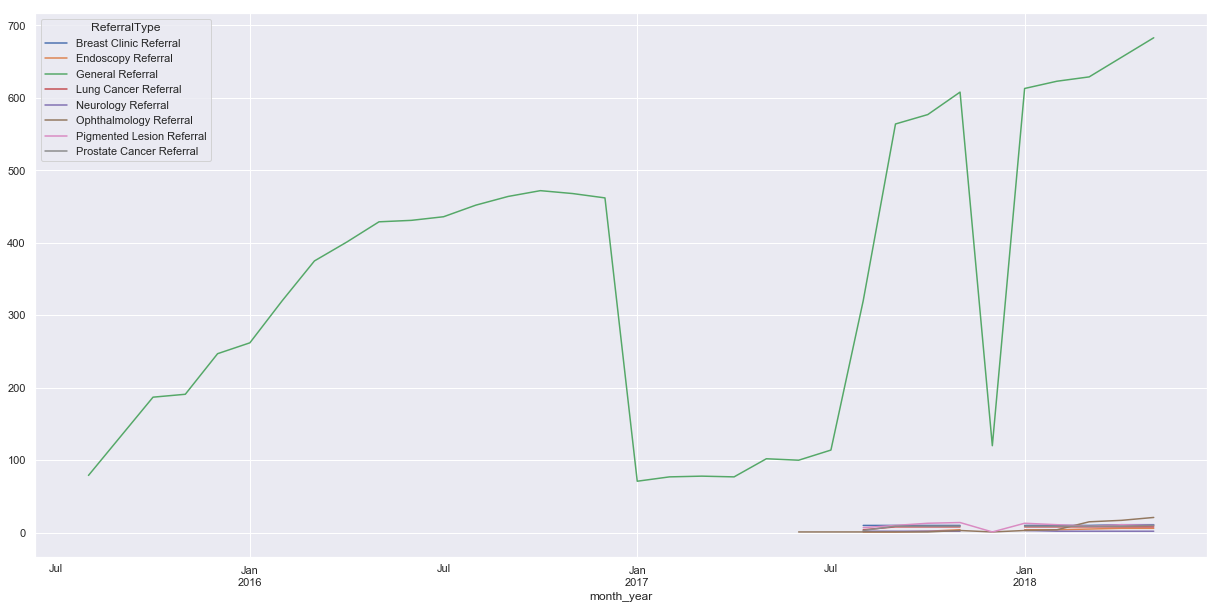

In [23]:
time_data.groupby(['month_year', 'ReferralType'])['TotalReferrals'].count().unstack().plot()

The legends get a bit out of hnd here so will need smarter groupng of the data.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'month_year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


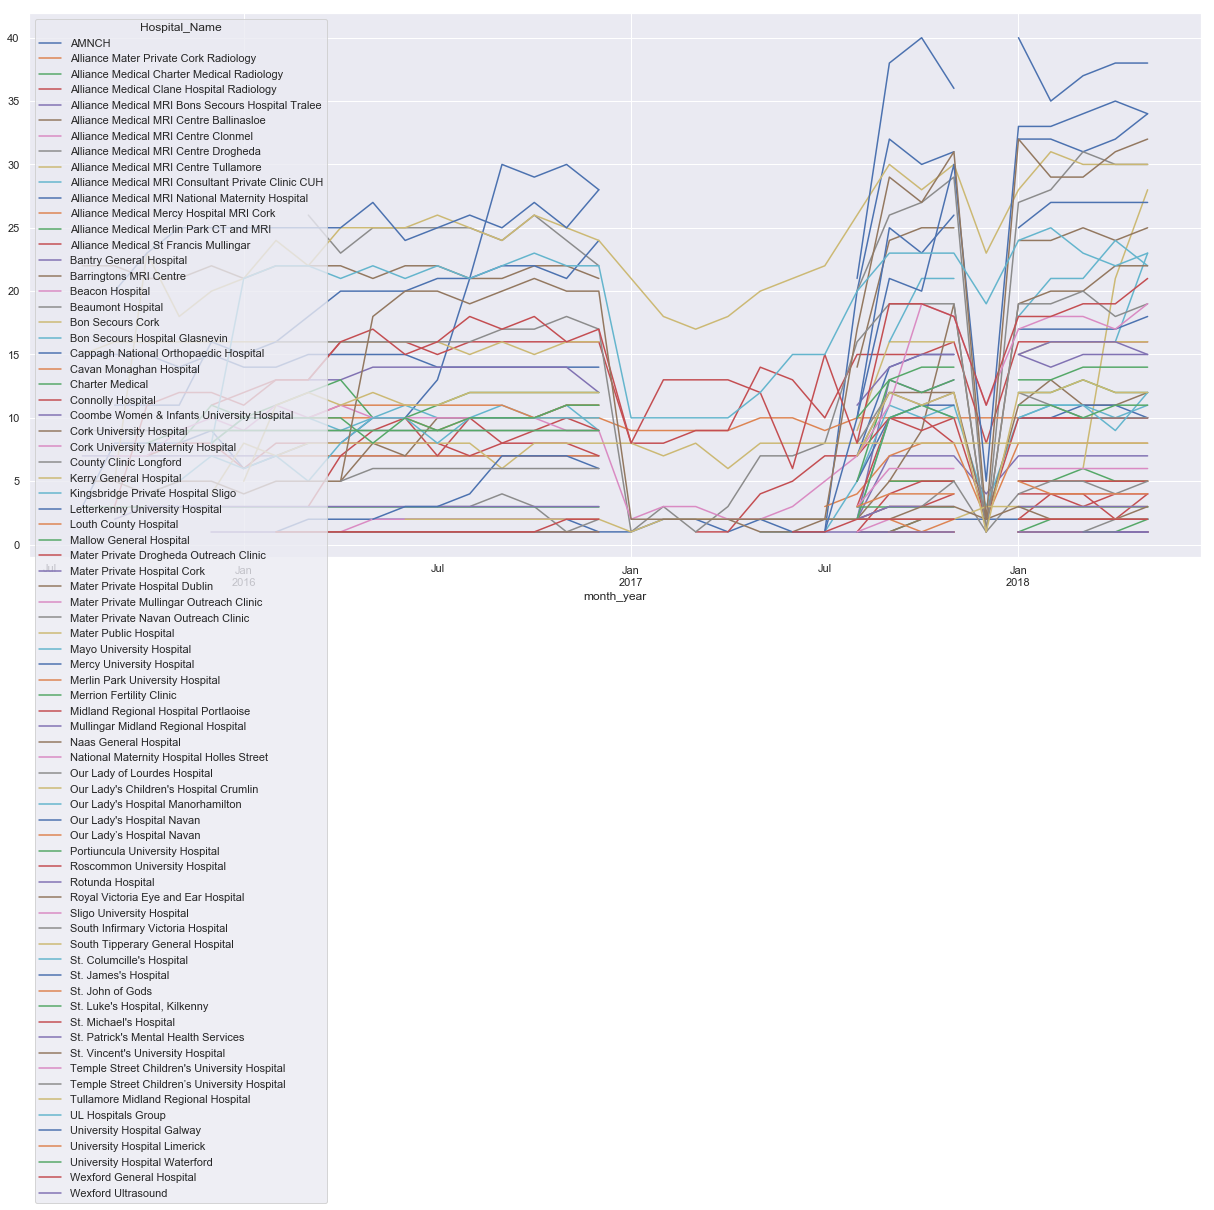

In [24]:
time_data.groupby(['month_year', 'Hospital_Name'])['TotalReferrals'].count().unstack().plot()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'month_year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


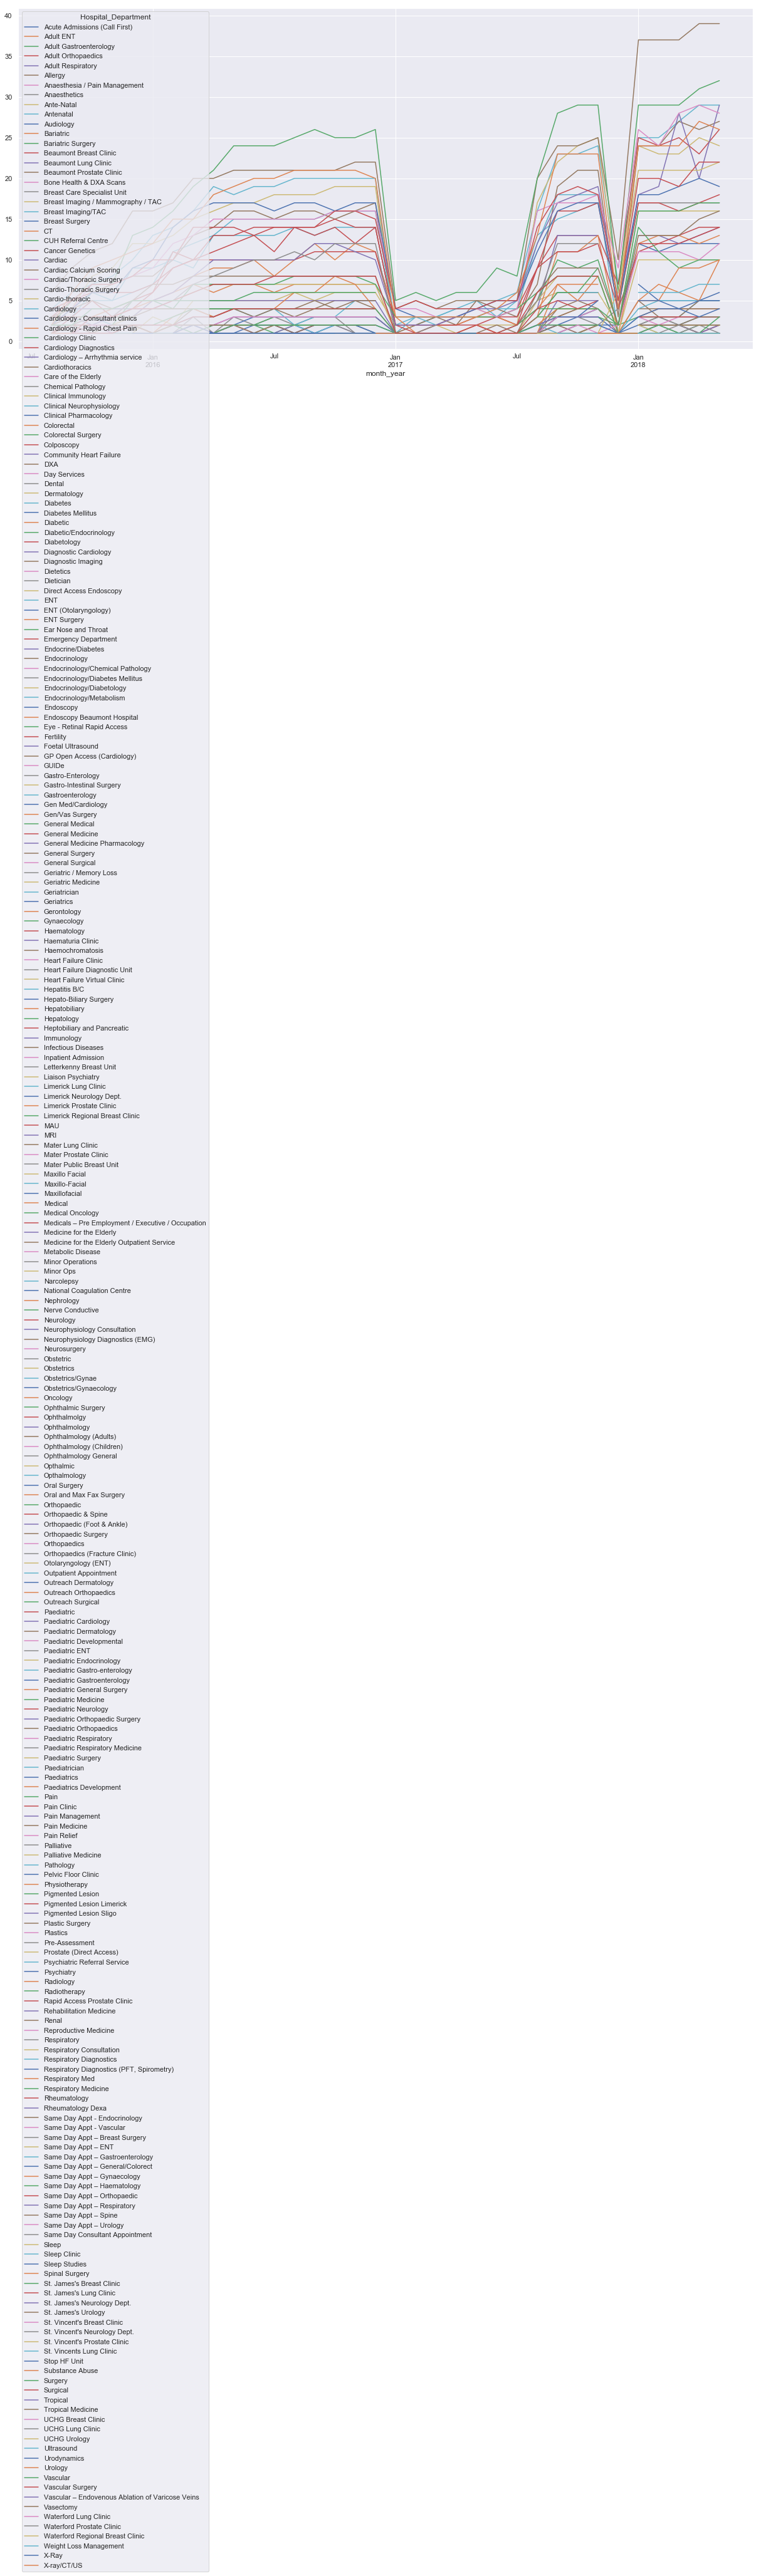

In [25]:
time_data.groupby(['month_year', 'Hospital_Department'])['TotalReferrals'].count().unstack().plot()